## 1. Import Library and Read Image Dataset from 2 Labels

In [39]:
"""
Melakukan proses deklarasi/meng-import library-library yang akan digunakan
selama proses klasifikasi data gambar kelengkapan APD/Alat Pelindung Diri
"""
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import cv2
from glob import *
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
"""
Melakukan proses pemanggilan seluruh data gambar dari kedua label yang ada di dalam folder
"Personal_Protective_Equipment_Dataset" yaitu label "Workers with PPE" dan label "Workers without PPE"
dan seluruh data gambar dari kedua label tersebut disimpan
di dalam variabel DataFrame yakni "PPE_images_dataset" dan "Without_PPE_images_dataset"
"""
PPE_images_dataset = "Personal_Protective_Equipment_Dataset/Workers with PPE"
without_PPE_images_dataset = "Personal_Protective_Equipment_Dataset/Workers without PPE"

In [41]:
"""
Memanggil semua gambar dari kedua label/kategori dengan seluruh
ekstensi gambar (.png/.jpg/.jpeg) tanpa terkecuali,
baik data-data gambar pekerja yang menggunakan Alat Pelindung Diri (APD)
dan pekerja yang tidak/kurang lengkap dalam menggunakan Alat Pelindung Diri (APD)
"""
complete_ppe_images = glob(PPE_images_dataset + "/*")
not_complete_ppe_images = glob(without_PPE_images_dataset + "/*")

Berdasarkan script diatas terdapat sebuah karakter spesial "/*" yang ditulis di dalam module glob. Module glob berfungsi untuk mencari dan mencocokkan data berdasarkan eksistensi format file dari data tersebut. Karakter spesial "/*" berfungsi untuk membaca/memuat seluruh data yang ada di dalam sub-folder/variabel dengan format/eksistensi file yang berbeda-beda.

Sebagai contoh jika di dalam modul glob, saya ingin menginisialisasikan/memanggil seluruh data gambar yang hanya berformat .PNG, maka saya harus membuat nama tujuan (pathname menjadi "/*.png" di dalam module glob. Jika saya hanya ingin memanggil seluruh data gambar yang hanya memiliki format .JPG, maka saya harus mendeklarasikan pathname menjadi "/*.JPG"

Untuk mencoba hipotesa yang saya sebutkan, maka saya akan mencoba menampilkan jumlah data gambar yang memiliki format ekstensi gambar .PNG dan .JPG dengan bantuan module glob untuk menmanggil gambar yang memiliki format tersebut.

In [42]:
"""
Memanggil data gambar yang memiliki format ekstensi .PNG dan .JPG dari kedua label eksperimen yaitu
gambar dengan pekerja yang menggunakan Personal Protective Equipment (PPE) lengkap serta
gambar dengan pekerja yang tidak/kurang lengkap menggunakan Personal Protective Equipment (PPE)
"""
# Label gambar dengan pekerja yang menggunakan PPE lengkap dengan format .PNG
complete_ppe_images_png = glob(PPE_images_dataset + "/*.PNG")
# Label gambar dengan  pekerja yang menggunakan PPE lengkap dengan format .JPG
complete_ppe_images_jpg = glob(PPE_images_dataset + "/*.JPG")

# Label gambar dengan pekerja yang menggunakan PPE tidak lengkap dengan format .PNG
not_complete_ppe_images_png = glob(without_PPE_images_dataset + "/*.PNG")
# Label gambar dengan  pekerja yang menggunakan PPE tidak lengkap dengan format .JPG
not_complete_ppe_images_jpg = glob(without_PPE_images_dataset + "/*.JPG")

In [43]:
"""
Menampilkan jumlah data dari masing-masing label
(pekerja yang lengkap dan tidak lengkap dalam menggunakan Personal Protective Equipment)
berdasarkan variabel yang didalamnya sudah terdapat data-data gambar dari setiap label
Selain itu saya juga akan menampilkan jumlah data dari masing-masing format ekstensi gambar dari kedua label
"""
print("----------------------------Jumlah Gambar dari Label Workers with PPE----------------------------")
print("Jumlah Data Gambar di dalam Label Workers with Complete PPE yang Berformat .PNG: ", len(complete_ppe_images_png))
print("Jumlah Data Gambar di dalam Label Workers with Complete PPE yang Berformat .JPG: ", len(complete_ppe_images_jpg))
print("Jumlah Seluruh Data Gambar di dalam Label Workers with Complete PPE: ", len(complete_ppe_images), "\n")

print("----------------------------Jumlah Gambar dari Label Workers without or Not Complete PPE----------------------------")
print("Jumlah Data Gambar di dalam Label Workers without or Not Complete PPE yang Berformat .PNG: ",
      len(not_complete_ppe_images_png))
print("Jumlah Data Gambar di dalam LabelWorkers without or Not Complete PPE yang Berformat .JPG: ",
      len(not_complete_ppe_images_jpg))
print("Jumlah Data Gambar di dalam Label Workers without or Not Complete PPE: ", len(not_complete_ppe_images))

----------------------------Jumlah Gambar dari Label Workers with PPE----------------------------
Jumlah Data Gambar di dalam Label Workers with Complete PPE yang Berformat .PNG:  683
Jumlah Data Gambar di dalam Label Workers with Complete PPE yang Berformat .JPG:  317
Jumlah Seluruh Data Gambar di dalam Label Workers with Complete PPE:  1000 

----------------------------Jumlah Gambar dari Label Workers without or Not Complete PPE----------------------------
Jumlah Data Gambar di dalam Label Workers without or Not Complete PPE yang Berformat .PNG:  415
Jumlah Data Gambar di dalam LabelWorkers without or Not Complete PPE yang Berformat .JPG:  585
Jumlah Data Gambar di dalam Label Workers without or Not Complete PPE:  1000


## 2. Display the Image Resolution/Dimension from each Labels

### 2.1. 10 Images Data Resolution from Workers with PPE Category

In [44]:
"""
Menampilkan dimensi resolusi dari sepuluh data gambar dari label "workers using PPE"
berdasarkan indeks gambar untuk mengetahui apakah sepuluh gambar dengan para
pekerja yang menggunakan alat pelindung diri/personal protective equipment secara lengkap ini
memiliki dimensi/ukuran piksel yang sama antar 1 data gambar dengan data gambar lainnya atau tidak
"""

print("--------------------Ukuran Piksel (Resolusi) dari 10 Data Gambar Pekerja menggunakan APD--------------------", "\n")

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-1
complete_ppe_image_1_resolution = Image.open(str(complete_ppe_images[0]))
width, height = complete_ppe_image_1_resolution.size # .size merupakan sebuah function untuk memanggil ukuran/dimensi pada suatu gambar

print("1. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-1 adalah:", str(width) + "x" + str(height))

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-63
complete_ppe_image_63_resolution = Image.open(str(complete_ppe_images[62]))
width, height = complete_ppe_image_63_resolution.size

print("2. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-63 adalah:", str(width) + "x" + str(height))

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-89
complete_ppe_image_89_resolution = Image.open(str(complete_ppe_images[88]))
width, height = complete_ppe_image_89_resolution.size

print("3. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-89 adalah:", str(width) + "x" + str(height))

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-30
complete_ppe_image_30_resolution = Image.open(str(complete_ppe_images[29]))
width, height = complete_ppe_image_30_resolution.size

print("4. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-30 adalah:", str(width) + "x" + str(height))

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-1000
complete_ppe_image_1000_resolution = Image.open(str(complete_ppe_images[999]))
width, height = complete_ppe_image_1000_resolution.size

print("5. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-1000 adalah:", str(width) + "x" + str(height))

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-462
complete_ppe_image_462_resolution = Image.open(str(complete_ppe_images[461]))
width, height = complete_ppe_image_462_resolution.size

print("6. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-462 adalah:", str(width) + "x" + str(height))

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-287
complete_ppe_image_287_resolution = Image.open(str(complete_ppe_images[286]))
width, height = complete_ppe_image_287_resolution.size

print("7. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-287 adalah:", str(width) + "x" + str(height))

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-927
complete_ppe_image_927_resolution = Image.open(str(complete_ppe_images[926]))
width, height = complete_ppe_image_927_resolution.size

print("8. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-927 adalah:", str(width) + "x" + str(height))

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-180
complete_ppe_image_180_resolution = Image.open(str(complete_ppe_images[179]))
width, height = complete_ppe_image_180_resolution.size

print("9. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-180 adalah:", str(width) + "x" + str(height))

# Gambar pekerja yang menggunakan Alat Pelindung Diri (APD) lengkap pada indeks ke-72
complete_ppe_image_72_resolution = Image.open(str(complete_ppe_images[71]))
width, height = complete_ppe_image_72_resolution.size

print("10. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-72 adalah:", str(width) + "x" + str(height))

--------------------Ukuran Piksel (Resolusi) dari 10 Data Gambar Pekerja menggunakan APD-------------------- 

1. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-1 adalah: 334x500
2. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-63 adalah: 99x188
3. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-89 adalah: 759x422
4. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-30 adalah: 1200x800
5. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-1000 adalah: 416x416
6. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-462 adalah: 416x416
7. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-287 adalah: 678x446
8. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-927 adalah: 800x533
9. Ukuran Piksel terhadap Data Gambar Pekerja menggunakan APD Indeks File ke-180 adalah: 1200x1540
10. Ukuran Piksel 

Berdasarkan hasil output diatas maka dapat diketahui jika ukuran piksel dari setiap gambar berlabel pekerja dengan APD lengkap tidak sama. Bahkan sepuluh gambar yang ditampilkan ukuran pikselnya memiliki ukuran width dan height yang berbeda-beda. Hal ini akan menjadi masalah dalam pemodelan menggunakan Algoritma Deep Neural Network dan memprediksi setiap gambar yang berasal dari label pekerja dengan APD lengkap karena nantinya model yang akan dibuat tidak dapat mengenali 100% gambar yang berasal dari label pekerja dengan APD lengkap. Maka dari itu saya akan mengubah ukuran piksel dari seluruh gambar yang berasal dari label pekerja dengan APD lengkap yang saat ini memiliki ukuran piksel berbeda-beda menjadi seragam antar 1 data gambar dengan data gambar lainnya.

Tahap selanjutnya adalah saya juga akan menampilkan ukuran piksel dari 10 data gambar yang berlabel pekerja yang tidak/kurang lengkap dalam menggunakan alat pelindung diri (APD). Tujuannya sudah sangat jelas yaitu untuk melihat apakah 10 data gambar yang berasal dari label pekerja yang tidak/kurang lengkap menggunakan APD memiliki ukuran yang seragam atau satu data gambar dengan data gambar lainnya juga berbeda seperti 10 gambar dari label pekerja dengan APD lengkap yang sudah ditampilkan ukuran pikselnya.

### 2.2. 10 Images Data Resolution from Workers without PPE Category

In [45]:
"""
Menampilkan dimensi resolusi dari sepuluh data gambar dari label "workers not using PPE"
berdasarkan indeks gambar untuk mengetahui apakah sepuluh gambar dengan para
pekerja yang tidak/kurang lengkap dalam menggunakan alat pelindung diri/personal protective equipment
memiliki dimensi/ukuran piksel yang sama antar 1 data gambar dengan data gambar lainnya atau tidak
"""

print("---------------Ukuran Piksel (Resolusi) dari 10 Data Gambar Pekerja yang tidak Menggunakan APD---------------", "\n")

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-1
without_ppe_image_1_resolution = Image.open(str(not_complete_ppe_images[0]))
width, height = without_ppe_image_1_resolution.size # .size merupakan sebuah function untuk memanggil ukuran/dimensi pada suatu gambar

print("1. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-1 adalah:",
      str(width) + "x" + str(height))

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-1000
without_ppe_image_1000_resolution = Image.open(str(not_complete_ppe_images[999]))
width, height = without_ppe_image_1000_resolution.size

print("2. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-1000 adalah:",
      str(width) + "x" + str(height))

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-22
without_ppe_image_22_resolution = Image.open(str(not_complete_ppe_images[21]))
width, height = without_ppe_image_22_resolution.size

print("3. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-22 adalah:",
      str(width) + "x" + str(height))

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-731
without_ppe_image_731_resolution = Image.open(str(not_complete_ppe_images[730]))
width, height = without_ppe_image_731_resolution.size

print("4. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-731 adalah:",
      str(width) + "x" + str(height))

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-945
without_ppe_image_945_resolution = Image.open(str(not_complete_ppe_images[944]))
width, height = without_ppe_image_945_resolution.size

print("5. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-945 adalah:",
      str(width) + "x" + str(height))

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-7
without_ppe_image_7_resolution = Image.open(str(not_complete_ppe_images[6]))
width, height = without_ppe_image_7_resolution.size

print("6. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-7 adalah:",
      str(width) + "x" + str(height))

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-371
without_ppe_image_371_resolution = Image.open(str(not_complete_ppe_images[370]))
width, height = without_ppe_image_371_resolution.size

print("7. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-371 adalah:",
      str(width) + "x" + str(height))

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-181
without_ppe_image_181_resolution = Image.open(str(not_complete_ppe_images[180]))
width, height = without_ppe_image_181_resolution.size

print("8. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-181 adalah:",
      str(width) + "x" + str(height))

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-569
without_ppe_image_569_resolution = Image.open(str(not_complete_ppe_images[568]))
width, height = without_ppe_image_569_resolution.size

print("9. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-569 adalah:",
      str(width) + "x" + str(height))

# Gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri (APD) pada indeks ke-274
without_ppe_image_274_resolution = Image.open(str(not_complete_ppe_images[273]))
width, height = without_ppe_image_274_resolution.size

print("10. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-274 adalah:",
      str(width) + "x" + str(height))

---------------Ukuran Piksel (Resolusi) dari 10 Data Gambar Pekerja yang tidak Menggunakan APD--------------- 

1. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-1 adalah: 1280x720
2. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-1000 adalah: 673x667
3. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-22 adalah: 1200x1600
4. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-731 adalah: 416x416
5. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-945 adalah: 416x416
6. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-7 adalah: 590x656
7. Ukuran Piksel Data Gambar Pekerja yang Kurang/tidak Lengkap dalam Menggunakan APD pada Indeks File ke-371 adalah: 416x416
8. Ukuran Piks

Berdasarkan hasil output diatas dapat diketahui jika beberapa gambar yang berlabel "workers without PPE" mengalami issue/permasalahan yang sama seperti pada 10 data gambar yang berlabel "workers with PPE". Permasalahan tersebut adalah ternyata 10 data gambar yang ditampilkan ukuran pikselnya tidak sama antara width dan height. Maka dari itu karena permasalahan inti pada eksperimen kali ini sudah sangat jelas yaitu ukuran resolusi/piksel pada setiap gambar yang tidak konsisten.

Untuk itu saya akan mengubah ukuran piksel dari seluruh data gambar dari kedua label menjadi seragam agar performa dan hasil prediksi dengan data testing dapat akurat serta model neural network yang akan dibuat dapat mempelajari sekumpulan data trainig yang berisikan gambar-gambar berlabel "workers with PPE" dan "Worker without PPE".

## 3. Display Images from 2 Labels: Workers with PPE and Workers without PPE

### 3.1. Display 5 Images Separately from Both Data Labels: Workers with PPE and Workers without PPE 

#### 3.1.1. Data Images from Workers with PPE

Personal_Protective_Equipment_Dataset/Workers with PPE\1008.png


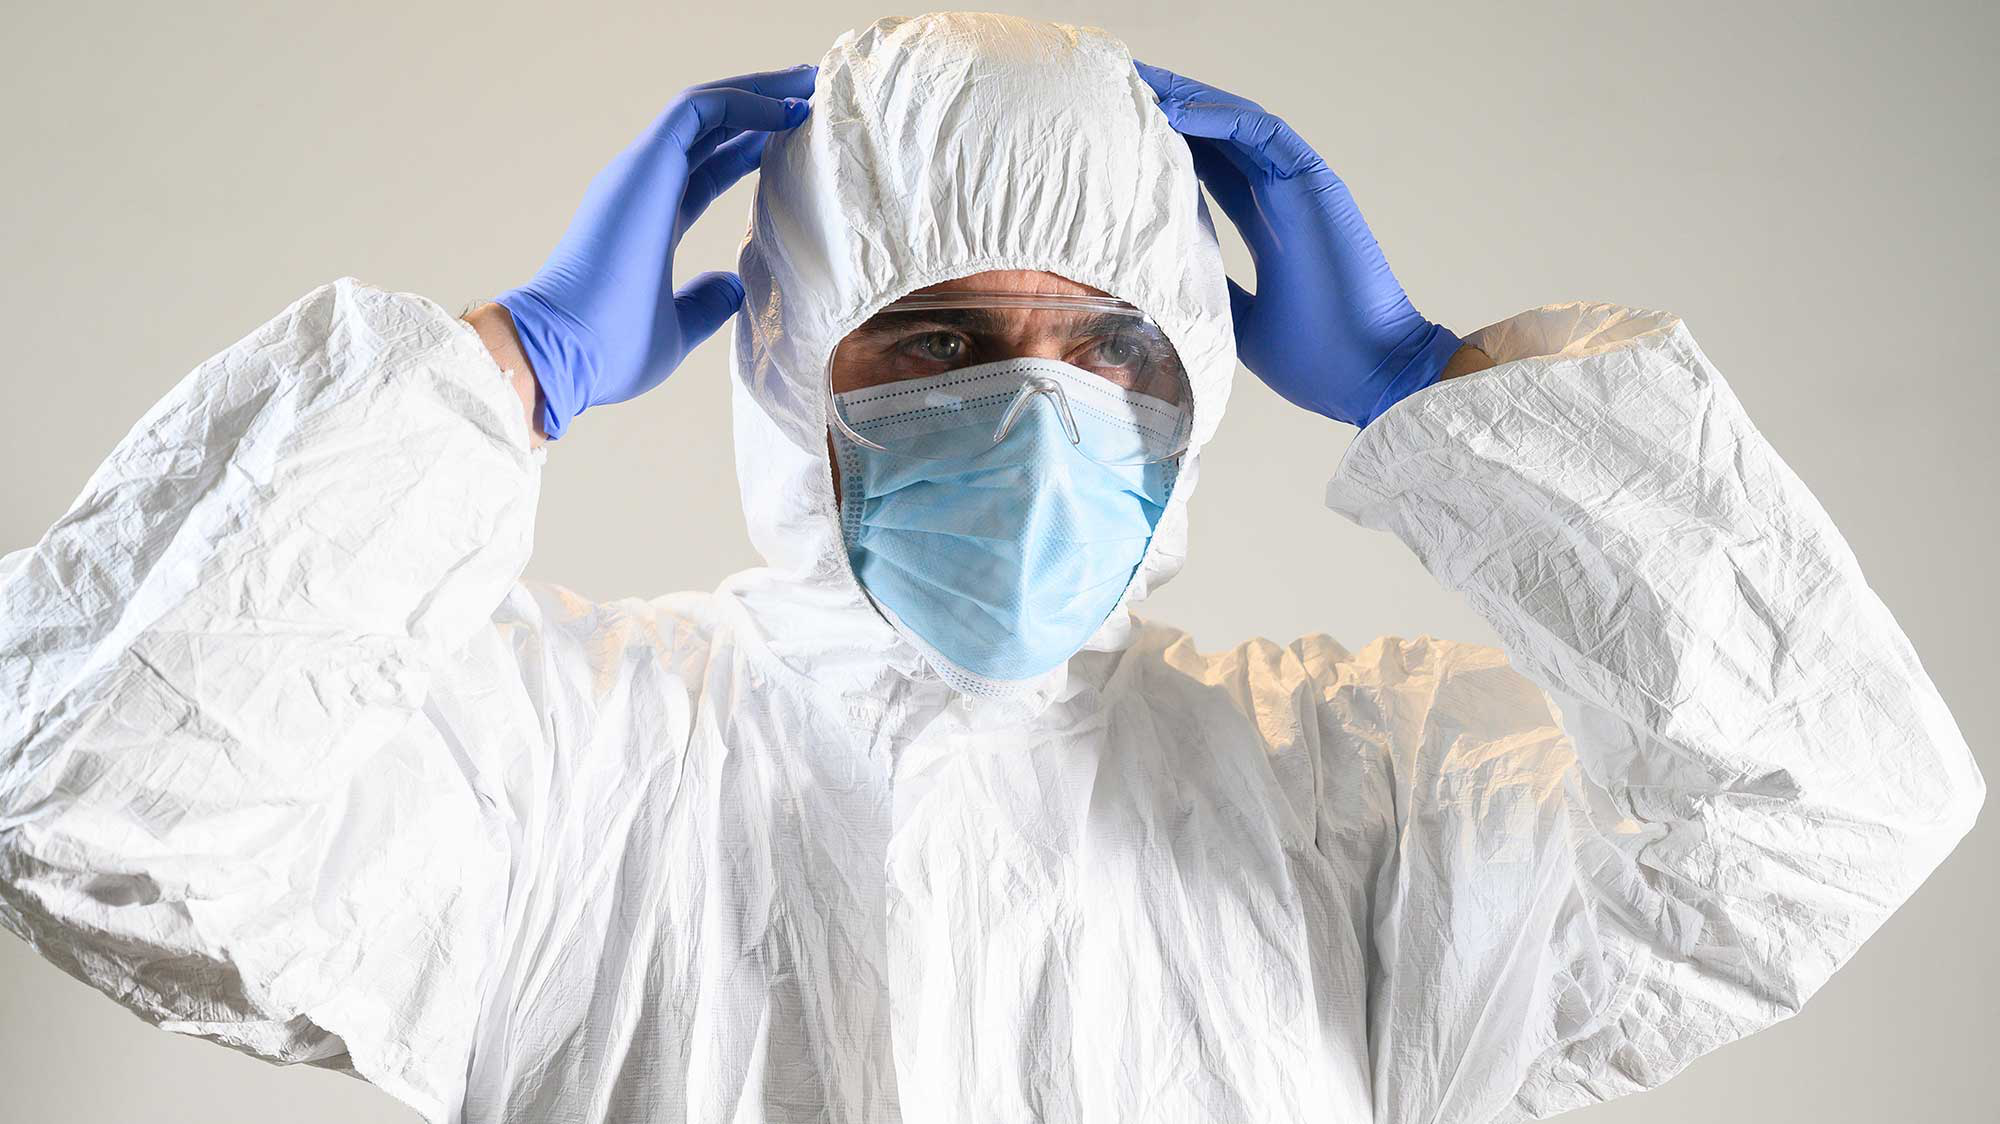

In [46]:
# Menampilkan gambar pekerja yang menggunakan Alat Pelindung Diri lengkap dengan indeks data gambar ke-9
workers_using_PPE_image_9 = list(complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "complete_ppe_images"
print(workers_using_PPE_image_9[8]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-1 diindikasikan sebagai indeks ke-0 karena Bahasa Python selalu mengawali urutan 1 sebagai angka 0

Image.open(str(workers_using_PPE_image_9[8])) # Membuka gambar yang memiliki indeks ke-9

Personal_Protective_Equipment_Dataset/Workers with PPE\hard_hat_workers3156.png


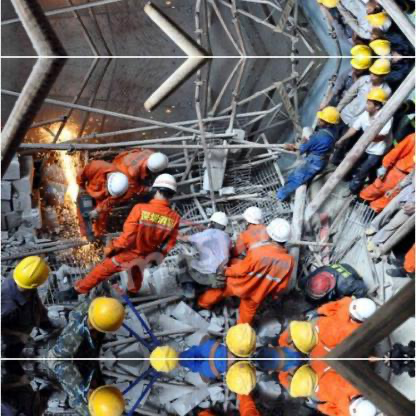

In [47]:
# Menampilkan gambar pekerja yang menggunakan Alat Pelindung Diri lengkap dengan indeks data gambar ke-647
workers_using_PPE_image_647 = list(complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "complete_ppe_images"
print(workers_using_PPE_image_647[646]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-647 diindikasikan sebagai indeks ke-646 karena Bahasa Python selalu mengawali urutan 647 sebagai angka 646

Image.open(str(workers_using_PPE_image_647[646])) # Membuka gambar yang memiliki indeks ke-647

Personal_Protective_Equipment_Dataset/Workers with PPE\ppe_0921_jpg.rf.fb60f28919cce27e84be197bb462a388.jpg


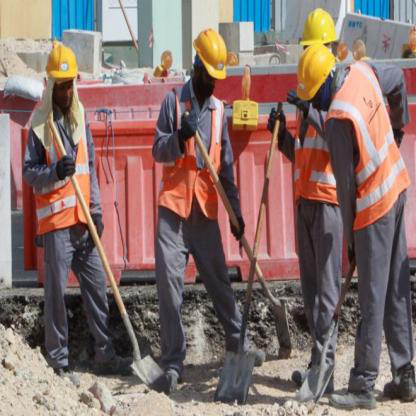

In [48]:
# Menampilkan gambar pekerja yang menggunakan Alat Pelindung Diri lengkap dengan indeks data gambar ke-1000
workers_using_PPE_image_1000 = list(complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "complete_ppe_images"
print(workers_using_PPE_image_1000[999]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-1000 diindikasikan sebagai indeks ke-999 karena Bahasa Python selalu mengawali urutan 1000 sebagai angka 999

Image.open(str(workers_using_PPE_image_1000[999])) # Membuka gambar yang memiliki indeks ke-1000

Personal_Protective_Equipment_Dataset/Workers with PPE\42.png


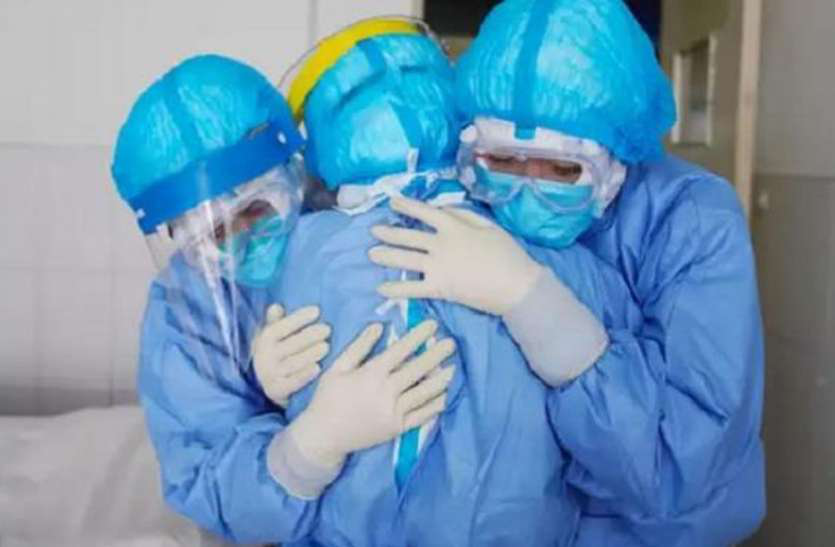

In [49]:
# Menampilkan gambar pekerja yang menggunakan Alat Pelindung Diri lengkap dengan indeks data gambar ke-231
workers_using_PPE_image_231 = list(complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "complete_ppe_images"
print(workers_using_PPE_image_231[230]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-231 diindikasikan sebagai indeks ke-230 karena Bahasa Python selalu mengawali urutan 231 sebagai angka 230

Image.open(str(workers_using_PPE_image_231[230])) # Membuka gambar yang memiliki indeks ke-231

Personal_Protective_Equipment_Dataset/Workers with PPE\186.png


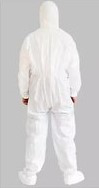

In [50]:
# Menampilkan gambar pekerja yang menggunakan Alat Pelindung Diri lengkap dengan indeks data gambar ke-63
workers_using_PPE_image_63 = list(complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "complete_ppe_images"
print(workers_using_PPE_image_63[62]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-63 diindikasikan sebagai indeks ke-62 karena Bahasa Python selalu mengawali urutan 63 sebagai angka 62

Image.open(str(workers_using_PPE_image_63[62])) # Membuka gambar yang memiliki indeks ke-63

#### 3.1.2. Data Images from Workers without PPE

Personal_Protective_Equipment_Dataset/Workers without PPE\195.png


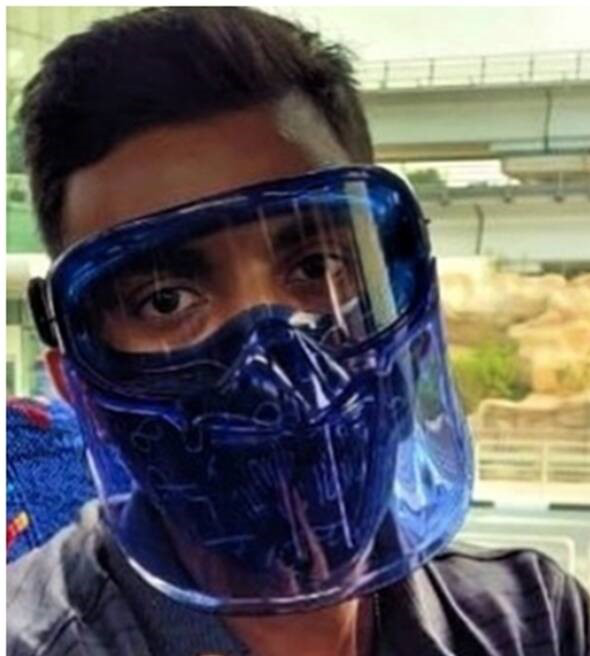

In [51]:
# Menampilkan gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri pada indeks data gambar ke-7
workers_not_complete_PPE_image_7 = list(not_complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "not_complete_ppe_images"
print(workers_not_complete_PPE_image_7[6]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-7 diindikasikan sebagai indeks ke-6 karena Bahasa Python selalu mengawali urutan 7 sebagai angka 6

Image.open(str(workers_not_complete_PPE_image_7[6])) # Membuka gambar yang memiliki indeks ke-7

Personal_Protective_Equipment_Dataset/Workers without PPE\IMG_1109_jpg.rf.3780928eb0dc480117e36489b2130ab5.jpg


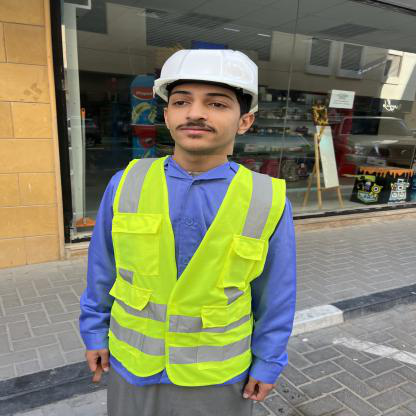

In [52]:
# Menampilkan gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri pada indeks data gambar ke-554
workers_not_complete_PPE_image_554 = list(not_complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "not_complete_ppe_images"
print(workers_not_complete_PPE_image_554[553]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-554 diindikasikan sebagai indeks ke-553 karena Bahasa Python selalu mengawali urutan data ke-554 sebagai angka 553

Image.open(str(workers_not_complete_PPE_image_554[553])) # Membuka gambar yang memiliki indeks ke-7

Personal_Protective_Equipment_Dataset/Workers without PPE\557.png


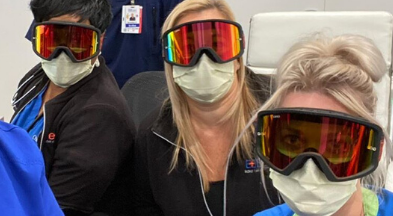

In [54]:
# Menampilkan gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri pada indeks data gambar ke-85
workers_not_complete_PPE_image_85 = list(not_complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "not_complete_ppe_images"
print(workers_not_complete_PPE_image_85[84]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-85 diindikasikan sebagai indeks ke-85 karena Bahasa Python selalu mengawali urutan data ke-85 sebagai angka 84

Image.open(str(workers_not_complete_PPE_image_85[84])) # Membuka gambar yang memiliki indeks ke-85

Personal_Protective_Equipment_Dataset/Workers without PPE\ppe_1224_jpg.rf.dce4b4f5fa4d4c7d341e1f8717dcfd53.jpg


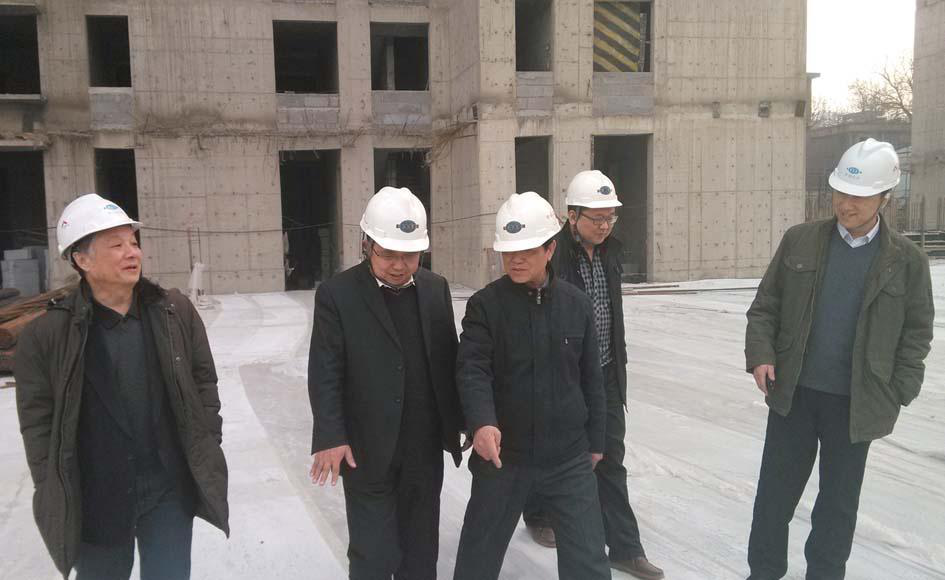

In [58]:
# Menampilkan gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri pada indeks data gambar ke-998
workers_not_complete_PPE_image_998 = list(not_complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "not_complete_ppe_images"
print(workers_not_complete_PPE_image_998[997]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-998 diindikasikan sebagai indeks ke-998 karena Bahasa Python selalu mengawali urutan data ke-998 sebagai angka 997

Image.open(str(workers_not_complete_PPE_image_998[997])) # Membuka gambar yang memiliki indeks ke-998

Personal_Protective_Equipment_Dataset/Workers without PPE\1002.png


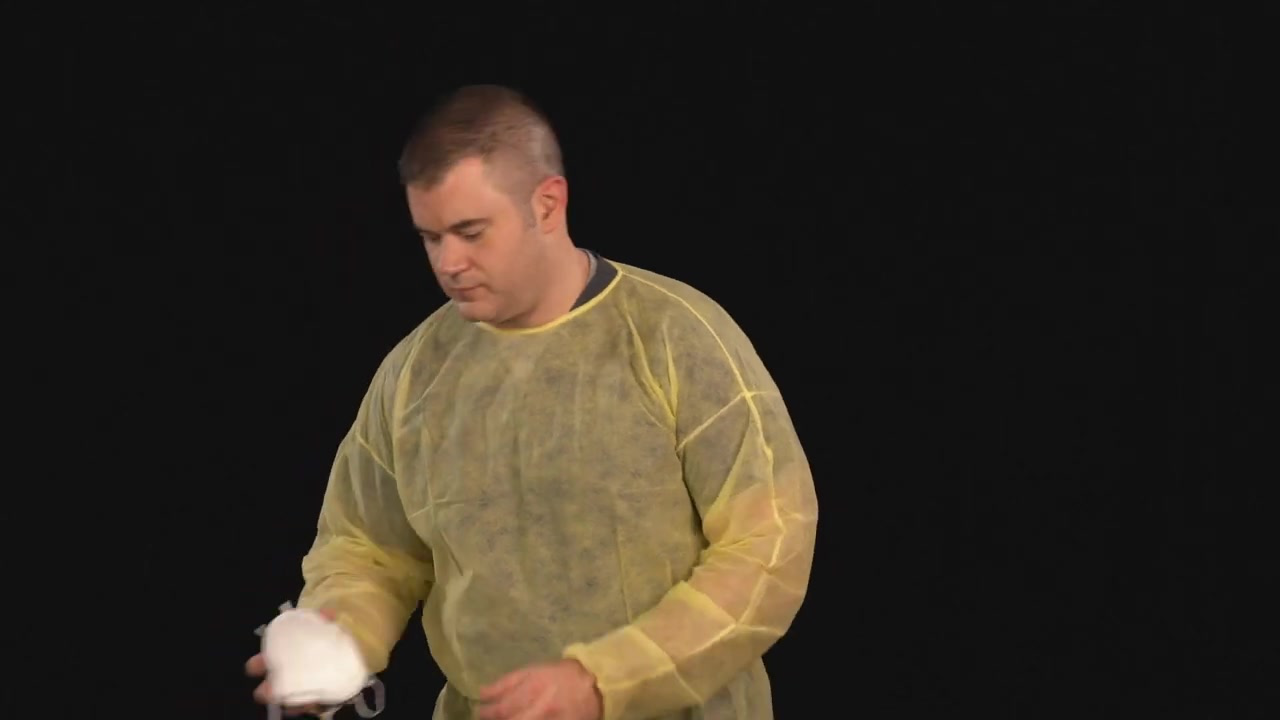

In [60]:
# Menampilkan gambar pekerja yang kurang lengkap/tidak menggunakan Alat Pelindung Diri pada indeks data gambar ke-1
workers_not_complete_PPE_image_1 = list(not_complete_ppe_images) # Fungsi dari list adalah untuk mendapatkan daftar gambar dari variabel "not_complete_ppe_images"
print(workers_not_complete_PPE_image_1[0]) # Setelah daftar gambar didapatkan selanjutnya dilakukan proses pencocokan indeks gambar dengan menampilkan nama file dan lokasi dari gambar. Data gambar ke-1 diindikasikan sebagai indeks ke-1 karena Bahasa Python selalu mengawali urutan data ke-1 sebagai angka 0

Image.open(str(workers_not_complete_PPE_image_1[0])) # Membuka gambar yang memiliki indeks ke-1

### 3.2.